In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = fetch_openml(data_id=40996,cache=True)

In [7]:
fashion_mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
x = fashion_mnist['data']
y = fashion_mnist['target']

fashion_mnist['DESCR']

"**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  \n**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  \n**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  \n\nFashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. \n\nRaw data available at: https://github.com/zalandoresearch/fashion-mnist\n\n### Target classes\nEach training and test example is assigned to one of the following labels:\nLabel  Description  \n0  T-shirt/top  \n1  Trouser  \n2  Pullover  \

In [17]:
x.shape

(70000, 784)

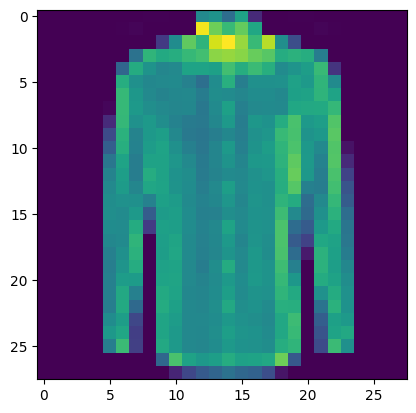

In [29]:
plt.imshow(x.iloc[3000,0:].values.reshape(28,28))

In [31]:
from sklearn.model_selection import train_test_split 

x_train ,x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.20)

In [32]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [36]:
scores = []
for i in range(1,16):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(x_train,y_train)
     y_pred = knn.predict(x_test)
     scores.append(accuracy_score(y_test,y_pred))

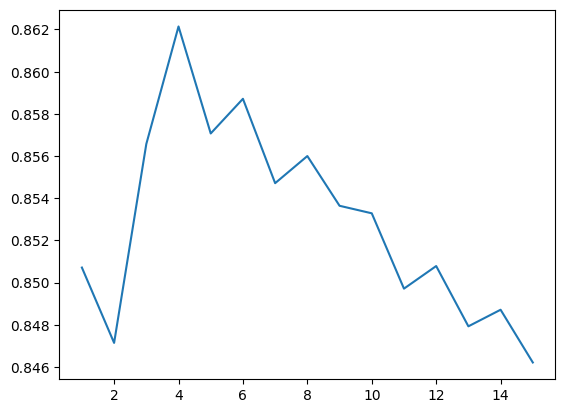

In [37]:
plt.plot(range(1,16),scores)

In [50]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.8621428571428571

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=190)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca,y_train)
y_pred = knn.predict(x_test_pca)
accuracy_score(y_test,y_pred)



0.8662142857142857